In [2]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [3]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2023-06-30')

[*********************100%***********************]  2 of 2 completed


In [4]:
raw

Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2010-01-04    6.496294   87.791779    7.643214  113.330002    7.660714   
2010-01-05    6.507526   88.024162    7.656429  113.629997    7.699643   
2010-01-06    6.404016   88.086143    7.534643  113.709999    7.686786   
2010-01-07    6.392175   88.457970    7.520714  114.190002    7.571429   
2010-01-08    6.434672   88.752327    7.570714  114.570000    7.571429   
...                ...         ...         ...         ...         ...   
2023-06-23  186.679993  433.209991  186.679993  433.209991  187.559998   
2023-06-26  185.270004  431.440002  185.270004  431.440002  188.050003   
2023-06-27  188.059998  436.170013  188.059998  436.170013  188.389999   
2023-06-28  189.250000  436.390015  189.250000  436.390015  189.899994   
2023-06-29  189.589996  438.109985  189.589996  438.109985  190.070007   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2010-01-04  113.389999    7.585000  111.510002    7.622500  112.370003   
2010-01-05  113.680000    7.616071  112.849998    7.664286  113.260002   
2010-01-06  113.989998    7.526786  113.430000    7.656429  113.519997   
2010-01-07  114.330002    7.466071  113.180000    7.562500  113.500000   
2010-01-08  114.620003    7.466429  113.660004    7.510714  113.889999   
...                ...         ...         ...         ...         ...   
2023-06-23  435.059998  185.009995  432.470001  185.550003  432.929993   
2023-06-26  434.609985  185.229996  431.190002  186.830002  432.619995   
2023-06-27  436.809998  185.669998  431.880005  185.889999  432.350006   
2023-06-28  437.440002  187.600006  434.410004  187.929993  435.049988   
2023-06-29  438.279999  188.940002  435.540009  189.080002  435.959991   

               Volume             
                 AAPL        SPY  
Date                              
2010-01-04  493729600  118944600  
2010-01-05  601904800  111579900  
2010-01-06  552160000  116074400  
2010-01-07  477131200  131091100  
2010-01-08  447610800  126402800  
...               ...        ...  
2023-06-23   53079300   92074500  
2023-06-26   48088700   72823600  
2023-06-27   50730800   72813700  
2023-06-28   51216800   75636000  
2023-06-29   46347300   67882300  

[3395 rows x 12 columns]

In [5]:
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           )

#### raw.pip? 
- the '?' is not a python code but a feature of jupyter notebook that pulls out the documentation of the code and shows it

In [10]:
raw.pipe?

Signature:
raw.pipe(
    func: 'Callable[..., T] | tuple[Callable[..., T], str]',
    *args,
    **kwargs,
) -> 'T'
Docstring:
Apply chainable functions that expect Series or DataFrames.

Parameters
----------
func : function
    Function to apply to the Series/DataFrame.
    ``args``, and ``kwargs`` are passed into ``func``.
    Alternatively a ``(callable, data_keyword)`` tuple where
    ``data_keyword`` is a string indicating the keyword of
    ``callable`` that expects the Series/DataFrame.
args : iterable, optional
    Positional arguments passed into ``func``.
kwargs : mapping, optional
    A dictionary of keyword arguments passed into ``func``.

Returns
-------
the return type of ``func``.

See Also
--------
DataFrame.apply : Apply a function along input axis of DataFrame.
DataFrame.applymap : Apply a function elementwise on a whole DataFrame.
Series.map : Apply a mapping correspondence on a
    :class:`~pandas.Series`.

Notes
-----
Use ``.pipe`` when chaining together functions

In [11]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

(raw
    .iloc[:, ::2]
    .pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.507526,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.392175,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.434672,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2023-06-23,186.679993,186.679993,187.559998,185.009995,185.550003,53079300
2023-06-26,185.270004,185.270004,188.050003,185.229996,186.830002,48088700
2023-06-27,188.059998,188.059998,188.389999,185.669998,185.889999,50730800


In [12]:
import yfinance as yf

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start='2010-01-01', end= '2023-06-30')

    return(raw
           .iloc[:, ::2]
           .pipe(fix_cols)
    )

tweak_data()

[*********************100%***********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.496296,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.507527,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.404015,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.392175,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.434674,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2023-06-23,186.679993,186.679993,187.559998,185.009995,185.550003,53079300
2023-06-26,185.270004,185.270004,188.050003,185.229996,186.830002,48088700
2023-06-27,188.059998,188.059998,188.389999,185.669998,185.889999,50730800


## Line Plot

In [13]:
(raw
 .iloc[:, :-2:2]
 .pipe(fix_cols)
 )

,Adj Close,Close,High,Low,Open
Date,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500
2010-01-05,6.507526,7.656429,7.699643,7.616071,7.664286
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429
2010-01-07,6.392175,7.520714,7.571429,7.466071,7.562500
2010-01-08,6.434672,7.570714,7.571429,7.466429,7.510714
...,...,...,...,...,...
2023-06-23,186.679993,186.679993,187.559998,185.009995,185.550003
2023-06-26,185.270004,185.270004,188.050003,185.229996,186.830002
2023-06-27,188.059998,188.059998,188.389999,185.669998,185.889999


<Axes: xlabel='Date'>

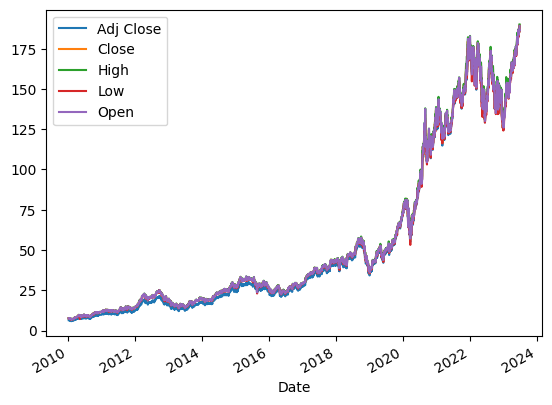

In [14]:
(raw
 .iloc[:, :-2:2]
 .pipe(fix_cols)
 .plot()
 )

<Axes: xlabel='Date'>

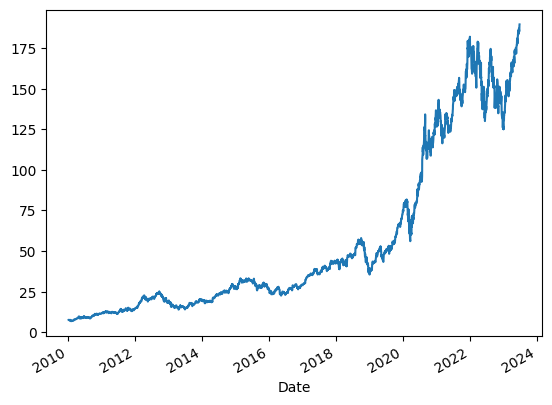

In [23]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Close
 .plot()
 )

<Axes: xlabel='Date'>

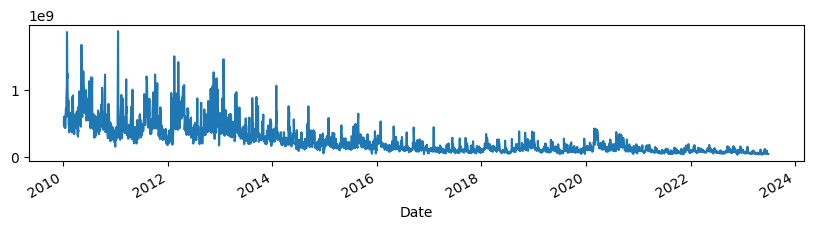

In [24]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Volume
 .plot(figsize=(10,2))
 )